<a href="https://colab.research.google.com/github/iam-fern/Generate_addition_2X/blob/main/GQtest_data(y_hat)_add_delta_(3_6)_n20_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition_2X/addition_delta_3.6'

In [4]:
os.listdir(base_path)

['data_add_delta_3.6_n250.csv',
 'data_add_delta_3.6_n120.csv',
 'data_add_delta_3.6_n60.csv',
 'data_add_delta_3.6_n30.csv',
 'data_add_delta_3.6_n20.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_3.6_n20.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,73.836764,61.855744,-1847.496959,-1701.804452,350.149419,-2051.953871
1,0.0,1.0,62.447966,33.378639,261.089906,366.916511,-353.526549,720.443060
2,0.0,2.0,85.963130,93.049475,4477.447304,4666.459908,1119.969334,3546.490574
3,0.0,3.0,42.940032,67.599439,2757.326341,2877.865812,398.405662,2479.460150
4,0.0,4.0,75.710369,27.374199,841.815788,954.900357,-457.695076,1412.595432
...,...,...,...,...,...,...,...,...
19995,999.0,15.0,43.268613,87.547450,-1242.135349,-1101.319286,-122.638738,-978.680549
19996,999.0,16.0,28.407381,91.113572,-1940.182673,-1810.661721,-375.919547,-1434.742174
19997,999.0,17.0,83.815309,45.455441,-713.594624,-574.323874,68.029908,-642.353782
19998,999.0,18.0,98.755946,43.119558,-474.309075,-322.433572,341.979962,-664.413534


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,73.836764,61.855744,-1847.496959,-1701.804452,350.149419,-2051.953871
1,0.0,1.0,62.447966,33.378639,261.089906,366.916511,-353.526549,720.443060
2,0.0,2.0,85.963130,93.049475,4477.447304,4666.459908,1119.969334,3546.490574
3,0.0,3.0,42.940032,67.599439,2757.326341,2877.865812,398.405662,2479.460150
4,0.0,4.0,75.710369,27.374199,841.815788,954.900357,-457.695076,1412.595432
...,...,...,...,...,...,...,...,...
19995,999.0,15.0,43.268613,87.547450,-1242.135349,-1101.319286,-122.638738,-978.680549
19996,999.0,16.0,28.407381,91.113572,-1940.182673,-1810.661721,-375.919547,-1434.742174
19997,999.0,17.0,83.815309,45.455441,-713.594624,-574.323874,68.029908,-642.353782
19998,999.0,18.0,98.755946,43.119558,-474.309075,-322.433572,341.979962,-664.413534


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2            e            Y        y_hat  \
rep   index                                                                
0.0   0.0    73.836764  61.855744 -1847.496959 -1701.804452   350.149419   
      1.0    62.447966  33.378639   261.089906   366.916511  -353.526549   
      2.0    85.963130  93.049475  4477.447304  4666.459908  1119.969334   
      3.0    42.940032  67.599439  2757.326341  2877.865812   398.405662   
      4.0    75.710369  27.374199   841.815788   954.900357  -457.695076   
...                ...        ...          ...          ...          ...   
999.0 15.0   43.268613  87.547450 -1242.135349 -1101.319286  -122.638738   
      16.0   28.407381  91.113572 -1940.182673 -1810.661721  -375.919547   
      17.0   83.815309  45.455441  -713.594624  -574.323874    68.029908   
      18.0   98.755946  43.119558  -474.309075  -322.433572   341.979962   
      19.0   51.507379  77.934864 -1958.656958 -1819.214715  -100.282873   

                   e_hat  
rep   index               
0.0   0.0   -2051.953871  
      1.0     720.443060  
      2.0    3546.490574  
      3.0    2479.460150  
      4.0    1412.595432  
...                  ...  
999.0 15.0   -978.680549  
      16.0  -1434.742174  
      17.0   -642.353782  
      18.0   -664.413534  
      19.0  -1718.931842  

[20000 rows x 6 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2            e            Y        y_hat  \
rep   index                                                                
0.0   0.0    73.836764  61.855744 -1847.496959 -1701.804452   350.149419   
      1.0    62.447966  33.378639   261.089906   366.916511  -353.526549   
      2.0    85.963130  93.049475  4477.447304  4666.459908  1119.969334   
      3.0    42.940032  67.599439  2757.326341  2877.865812   398.405662   
      4.0    75.710369  27.374199   841.815788   954.900357  -457.695076   
...                ...        ...          ...          ...          ...   
999.0 15.0   43.268613  87.547450 -1242.135349 -1101.319286  -122.638738   
      16.0   28.407381  91.113572 -1940.182673 -1810.661721  -375.919547   
      17.0   83.815309  45.455441  -713.594624  -574.323874    68.029908   
      18.0   98.755946  43.119558  -474.309075  -322.433572   341.979962   
      19.0   51.507379  77.934864 -1958.656958 -1819.214715  -100.282873   

                   e_hat  
rep   index               
0.0   0.0   -2051.953871  
      1.0     720.443060  
      2.0    3546.490574  
      3.0    2479.460150  
      4.0    1412.595432  
...                  ...  
999.0 15.0   -978.680549  
      16.0  -1434.742174  
      17.0   -642.353782  
      18.0   -664.413534  
      19.0  -1718.931842  

[20000 rows x 6 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,73.836764,61.855744,-1847.496959,-1701.804452,350.149419,-2051.953871
1,0.0,1.0,62.447966,33.378639,261.089906,366.916511,-353.526549,720.443060
2,0.0,2.0,85.963130,93.049475,4477.447304,4666.459908,1119.969334,3546.490574
3,0.0,3.0,42.940032,67.599439,2757.326341,2877.865812,398.405662,2479.460150
4,0.0,4.0,75.710369,27.374199,841.815788,954.900357,-457.695076,1412.595432
...,...,...,...,...,...,...,...,...
19995,999.0,15.0,43.268613,87.547450,-1242.135349,-1101.319286,-122.638738,-978.680549
19996,999.0,16.0,28.407381,91.113572,-1940.182673,-1810.661721,-375.919547,-1434.742174
19997,999.0,17.0,83.815309,45.455441,-713.594624,-574.323874,68.029908,-642.353782
19998,999.0,18.0,98.755946,43.119558,-474.309075,-322.433572,341.979962,-664.413534


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2            e            Y        y_hat  \
rep   index                                                                
0.0   0.0    73.836764  61.855744 -1847.496959 -1701.804452   350.149419   
      1.0    62.447966  33.378639   261.089906   366.916511  -353.526549   
      2.0    85.963130  93.049475  4477.447304  4666.459908  1119.969334   
      3.0    42.940032  67.599439  2757.326341  2877.865812   398.405662   
      4.0    75.710369  27.374199   841.815788   954.900357  -457.695076   
...                ...        ...          ...          ...          ...   
999.0 15.0   43.268613  87.547450 -1242.135349 -1101.319286  -122.638738   
      16.0   28.407381  91.113572 -1940.182673 -1810.661721  -375.919547   
      17.0   83.815309  45.455441  -713.594624  -574.323874    68.029908   
      18.0   98.755946  43.119558  -474.309075  -322.433572   341.979962   
      19.0   51.507379  77.934864 -1958.656958 -1819.214715  -100.282873   

                   e_hat  
rep   index               
0.0   0.0   -2051.953871  
      1.0     720.443060  
      2.0    3546.490574  
      3.0    2479.460150  
      4.0    1412.595432  
...                  ...  
999.0 15.0   -978.680549  
      16.0  -1434.742174  
      17.0   -642.353782  
      18.0   -664.413534  
      19.0  -1718.931842  

[20000 rows x 6 columns]

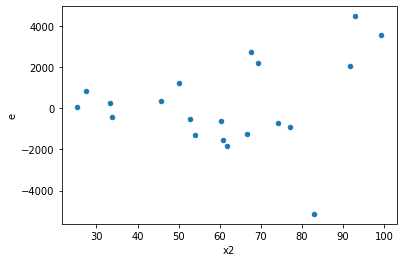

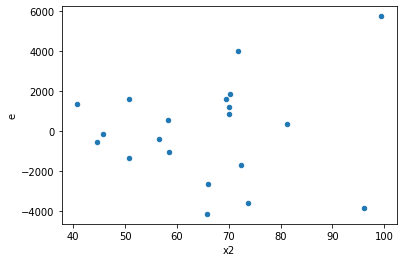

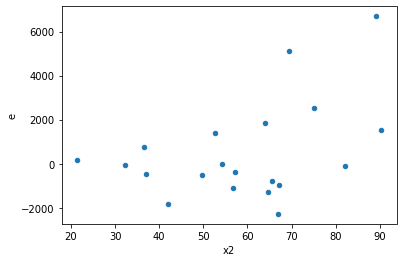

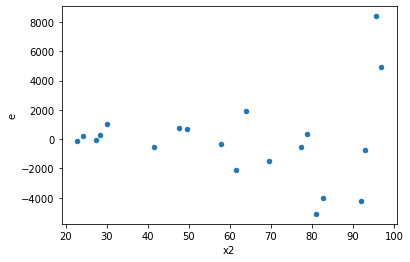

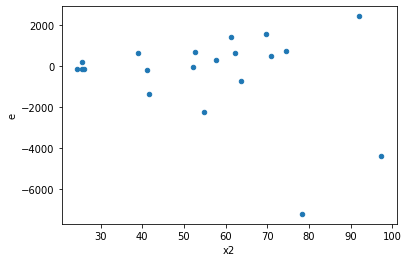

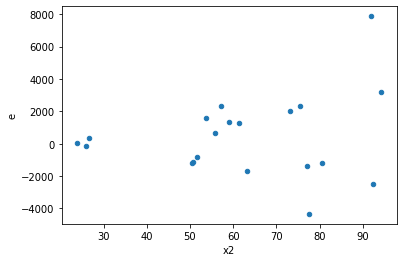

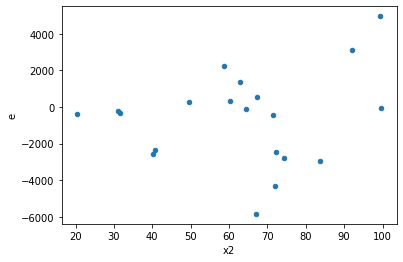

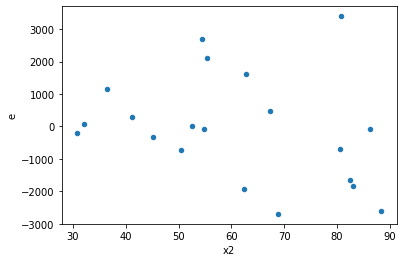

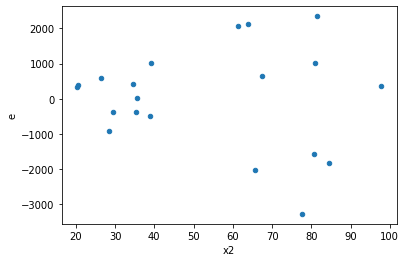

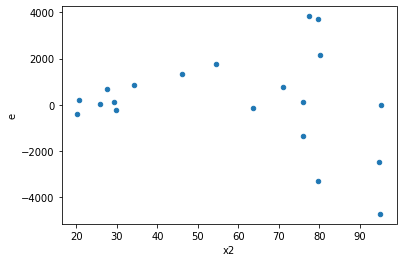

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม y_hat
    new_table_sort = new_table.sort_values('y_hat')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,6.0,6.0,1259659.2074057402,51483570.429628775,209943.20123429003,8580595.071604796,40.871030931976314,0.0002627842577693773,0.9998686078711153,0.00013139212888468865,Reject005=0 : Heteroscedasticity
1.0,6.0,6.0,15696114.999942545,49485524.26813157,2616019.1666570907,8247587.3780219285,3.152724369585258,0.18811451427863068,0.9059427428606847,0.09405725713931534,Reject005=1 : Homoscedasticity
2.0,6.0,6.0,4169265.7469549375,49689256.47637765,694877.6244924896,8281542.746062942,11.917987360884506,0.008233854748960434,0.9958830726255198,0.004116927374480217,Reject005=0 : Heteroscedasticity
3.0,6.0,6.0,7385454.190392539,16641122.181739349,1230909.0317320898,2773520.3636232247,2.253229354991757,0.3459785478059203,0.8270107260970398,0.17298927390296015,Reject005=1 : Homoscedasticity
5.0,6.0,6.0,18508429.4508681,65304435.40678461,3084738.24181135,10884072.567797435,3.5283617975333743,0.15033870007367467,0.9248306499631627,0.07516935003683733,Reject005=1 : Homoscedasticity
8.0,6.0,6.0,3249140.9221165786,10909652.3310044,541523.4870194298,1818275.3885007333,3.35770364921493,0.16613178259874717,0.9169341087006264,0.08306589129937358,Reject005=1 : Homoscedasticity
12.0,6.0,6.0,7005620.099842294,14947836.649394773,1167603.3499737156,2491306.1082324623,2.133692155207113,0.3785345446388433,0.8107327276805784,0.18926727231942164,Reject005=1 : Homoscedasticity
19.0,6.0,6.0,5165547.7627000455,43723596.56245093,860924.6271166742,7287266.093741822,8.464464674622715,0.020009929166318496,0.9899950354168408,0.010004964583159248,Reject005=0 : Heteroscedasticity
21.0,6.0,6.0,1439424.9494497594,31140931.31576388,239904.15824162657,5190155.21929398,21.634286197184466,0.0016124815588152153,0.9991937592205924,0.0008062407794076076,Reject005=0 : Heteroscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,6.0,6.0,1259659.2074057402,51483570.429628775,209943.20123429003,8580595.071604796,40.871030931976314,0.0002627842577693773,Reject005=0 : Heteroscedasticity
1.0,6.0,6.0,15696114.999942545,49485524.26813157,2616019.1666570907,8247587.3780219285,3.152724369585258,0.18811451427863068,Reject005=1 : Homoscedasticity
2.0,6.0,6.0,4169265.7469549375,49689256.47637765,694877.6244924896,8281542.746062942,11.917987360884506,0.008233854748960434,Reject005=0 : Heteroscedasticity
3.0,6.0,6.0,7385454.190392539,16641122.181739349,1230909.0317320898,2773520.3636232247,2.253229354991757,0.3459785478059203,Reject005=1 : Homoscedasticity
4.0,6.0,6.0,71602855.31063761,478716.7522419404,11933809.218439601,79786.12537365673,0.00668572154231984,5.800382113626862e-06,Reject005=0 : Heteroscedasticity
5.0,6.0,6.0,18508429.4508681,65304435.40678461,3084738.24181135,10884072.567797435,3.5283617975333743,0.15033870007367467,Reject005=1 : Homoscedasticity
6.0,6.0,6.0,31436171.892114077,20386702.29991949,5239361.982019013,3397783.7166532483,0.6485109691435934,0.6121709164212616,Reject005=1 : Homoscedasticity
7.0,6.0,6.0,28122664.11436493,5300819.126219617,4687110.685727488,883469.8543699362,0.1884892236618501,0.0620062606544493,Reject005=1 : Homoscedasticity
8.0,6.0,6.0,3249140.9221165786,10909652.3310044,541523.4870194298,1818275.3885007333,3.35770364921493,0.16613178259874717,Reject005=1 : Homoscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject005=0 : Heteroscedasticity    548
Reject005=1 : Homoscedasticity      452
Name: Result_test, dtype: int64